In [34]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Data Processing

In [2]:
data_path = './archive/'

In [3]:
data = pd.read_csv(data_path + 'train.csv')
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
all_features = data.columns.to_list()
print(all_features)

['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [5]:
remove_features = ['v.id', 'on road old', 'on road now']
features = [feature for feature in all_features if feature not in remove_features]
print(features)

['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [6]:
# sns.pairplot(data[features], diag_kind='kde')

In [7]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Convert data to tensor data

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data.shape)
print(tensor_data)

(1000, 12)
tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[4.590000e+02 6.800560e+05 7.425110e+05 7.000000e+00 6.168700e+04
  4.000000e+00 2.000000e+00 8.000000e+00 1.540000e+02 6.900000e+01
  7.400000e+01 4.568405e+05]
 [1.110000e+02 5.747560e+05 8.907700e+05 5.000000e+00 6.116000e+04
  3.000000e+00 6.000000e+00 9.000000e+00 1.670000e+02 6.500000e+01
  1.060000e+02 4.907795e+05]
 [2.670000e+02 6.431000e+05 8.602680e+05 3.000000e+00 1.112890e+05
  2.000000e+00 1.000000e+00 1.200000e+01 1.530000e+02 8.000000e+01
  9.700000e+01 3.066600e+05]
 [4.140000e+02 5.067880e+05 8.554170e+05 2.000000e+00 1.233170e+05
  2.000000e+00 2.000000e+00 1.300000e+01 1.800000e+02 8.800000e+01
  1.250000e+02 1.881315e+05]
 [5.400000e+02 5.055600e+05 8.176680e+05 6.000000e+00 1.246100e+05
  3.000000e+00 1.000000e+00 1.100000e+01 1.590000e+02 7.100000e+01
  1.270000e+02 1.596470e+05]], shape=(5, 12), dtype=float32)


In [10]:
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[7.00000e+00 6.16870e+04 4.00000e+00 2.00000e+00 8.00000e+00 1.54000e+02
  6.90000e+01 7.40000e+01]
 [5.00000e+00 6.11600e+04 3.00000e+00 6.00000e+00 9.00000e+00 1.67000e+02
  6.50000e+01 1.06000e+02]
 [3.00000e+00 1.11289e+05 2.00000e+00 1.00000e+00 1.20000e+01 1.53000e+02
  8.00000e+01 9.70000e+01]
 [2.00000e+00 1.23317e+05 2.00000e+00 2.00000e+00 1.30000e+01 1.80000e+02
  8.80000e+01 1.25000e+02]
 [6.00000e+00 1.24610e+05 3.00000e+00 1.00000e+00 1.10000e+01 1.59000e+02
  7.10000e+01 1.27000e+02]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=1)
print(y.shape)
print(y[:5])

(1000, 1)
tf.Tensor(
[[456840.5]
 [490779.5]
 [306660. ]
 [188131.5]
 [159647. ]], shape=(5, 1), dtype=float32)


## Normalization
$$
\text{normalization} = \frac{X - \mu}{\sigma}, \quad \text{where $\mu$ = mean and $\sigma$ = std}
$$
```
Normalization()
```
Default axis = -1 means mean and std will be calculated based on columns, and then normalization will be performed along the columns.

In [12]:
TRAINING_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [13]:
x_train = x[:int(DATASET_SIZE*TRAINING_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAINING_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [14]:
x_val = x[int(DATASET_SIZE*TRAINING_RATIO):int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAINING_RATIO):int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [15]:
x_test = x[int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAINING_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [16]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.421489  , -1.3324076 ,  0.7002683 , -1.2485743 , -1.6169959 ,
        -0.6802361 , -0.77035034, -1.4082422 ],
       [ 0.24731137, -1.3504069 , -0.00976264,  0.16075145, -1.1698488 ,
        -0.01024139, -0.96422553,  0.11046158],
       [-0.9268663 ,  0.36170423, -0.71979356, -1.6009057 ,  0.17159271,
        -0.73177415, -0.23719358, -0.31667385],
       [-1.5139551 ,  0.7725098 , -0.71979356, -1.2485743 ,  0.6187399 ,
         0.65975326,  0.15055679,  1.0121919 ],
       [ 0.8344002 ,  0.8166711 , -0.00976264, -1.6009057 , -0.27555448,
        -0.42254582, -0.67341274,  1.1071109 ]], dtype=float32)>

In [28]:
print(x[:5])

tf.Tensor(
[[7.00000e+00 6.16870e+04 4.00000e+00 2.00000e+00 8.00000e+00 1.54000e+02
  6.90000e+01 7.40000e+01]
 [5.00000e+00 6.11600e+04 3.00000e+00 6.00000e+00 9.00000e+00 1.67000e+02
  6.50000e+01 1.06000e+02]
 [3.00000e+00 1.11289e+05 2.00000e+00 1.00000e+00 1.20000e+01 1.53000e+02
  8.00000e+01 9.70000e+01]
 [2.00000e+00 1.23317e+05 2.00000e+00 2.00000e+00 1.30000e+01 1.80000e+02
  8.80000e+01 1.25000e+02]
 [6.00000e+00 1.24610e+05 3.00000e+00 1.00000e+00 1.10000e+01 1.59000e+02
  7.10000e+01 1.27000e+02]], shape=(5, 8), dtype=float32)


In [17]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)  # as we need only one output for current_price.
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


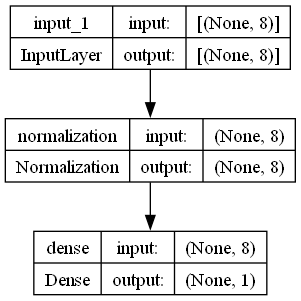

In [18]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## Training and Optimization

In [19]:
model.compile(
    optimizer=Adam(),
    loss=MeanAbsoluteError(),
    metrics = RootMeanSquaredError()
)

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, verbose=1)

Epoch 1/100

25/25 [==============================] - 1s 20ms/step - loss: 307468.6250 - root_mean_squared_error: 332628.6875 - val_loss: 303874.5938 - val_root_mean_squared_error: 327747.9375
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 307468.6250 - root_mean_squared_error: 332628.6250 - val_loss: 303874.5625 - val_root_mean_squared_error: 327747.9062
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 307468.5938 - root_mean_squared_error: 332628.6250 - val_loss: 303874.5312 - val_root_mean_squared_error: 327747.8750
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 307468.6250 - root_mean_squared_error: 332628.6250 - val_loss: 303874.5000 - val_root_mean_squared_error: 327747.8750
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 307468.5938 - root_mean_squared_error: 332628.5938 - val_loss: 303874.4688 - val_root_mean_squared_error: 327747.8438
Epoch 6/100
25/25 [========================

In [21]:
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
root_mean_squared_error = history.history['root_mean_squared_error']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
print(loss)
print(val_loss)
print(root_mean_squared_error)
print(val_root_mean_squared_error)

[307468.625, 307468.625, 307468.59375, 307468.625, 307468.59375, 307468.5625, 307468.53125, 307468.46875, 307468.4375, 307468.4375, 307468.40625, 307468.40625, 307468.40625, 307468.3125, 307468.375, 307468.34375, 307468.25, 307468.25, 307468.25, 307468.1875, 307468.1875, 307468.125, 307468.09375, 307468.125, 307468.0625, 307468.0625, 307468.03125, 307467.9375, 307467.96875, 307467.96875, 307467.90625, 307467.90625, 307467.90625, 307467.8125, 307467.84375, 307467.8125, 307467.75, 307467.71875, 307467.71875, 307467.6875, 307467.625, 307467.59375, 307467.59375, 307467.625, 307467.59375, 307467.59375, 307467.53125, 307467.46875, 307467.40625, 307467.4375, 307467.4375, 307467.375, 307467.40625, 307467.375, 307467.375, 307467.28125, 307467.3125, 307467.25, 307467.21875, 307467.1875, 307467.1875, 307467.09375, 307467.09375, 307467.09375, 307467.0625, 307467.0, 307467.0, 307466.96875, 307466.96875, 307466.90625, 307466.90625, 307466.90625, 307466.875, 307466.90625, 307466.8125, 307466.75, 3074

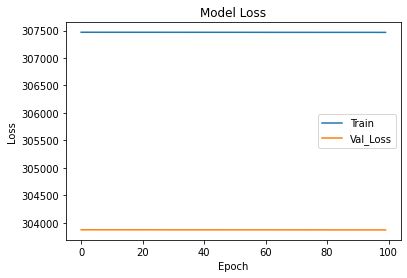

In [23]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val_Loss'])
plt.show()

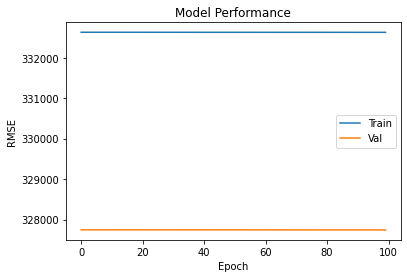

In [24]:
plt.plot(root_mean_squared_error)
plt.plot(val_root_mean_squared_error)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(['Train', 'Val'])
plt.show()

In [25]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 321575.4688 - root_mean_squared_error: 343623.1875


[321575.46875, 343623.1875]

## Validation and Testing

In [29]:
print(x_test[0])

tf.Tensor(
[2.0000e+00 9.2717e+04 4.0000e+00 9.0000e+00 1.2000e+01 1.9200e+02
 7.6000e+01 7.3000e+01], shape=(8,), dtype=float32)


In [26]:
model.predict(tf.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 268ms/step


array([[2.1163244]], dtype=float32)

In [27]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([280123.], dtype=float32)>

In [32]:
y_true = list(y_test[:, 0].numpy())
print(y_true)

[280123.0, 373529.0, 459833.5, 153991.0, 312164.5, 539377.0, 304818.0, 113700.0, 172758.5, 184571.0, 547378.0, 462715.5, 547069.0, 438223.0, 395188.0, 428602.5, 156513.0, 387321.5, 501083.5, 284462.5, 264576.5, 285487.0, 340429.5, 230080.0, 293875.5, 332478.5, 490000.5, 192576.0, 155719.0, 258268.5, 393104.0, 132026.5, 469956.0, 146527.0, 304354.0, 226087.5, 140216.5, 512492.0, 227845.5, 389925.5, 542371.0, 335093.5, 242950.0, 458537.0, 234835.5, 425960.0, 382241.0, 203811.5, 220518.0, 172032.5, 169471.0, 211528.5, 316184.0, 368522.5, 230428.5, 424305.0, 258692.0, 306745.5, 415103.0, 479318.5, 360647.5, 242273.5, 506401.0, 182219.5, 322204.0, 165595.0, 459686.5, 294378.5, 318858.0, 282821.5, 432159.5, 486308.5, 462397.5, 248738.0, 427590.0, 248983.0, 457463.0, 228892.5, 470373.0, 441395.5, 377108.5, 174399.0, 90220.0, 500679.5, 460019.5, 171620.0, 218665.5, 253530.5, 333278.0, 403213.5, 397522.0, 364898.0, 307096.0, 163814.0, 320008.0, 196816.0, 232192.0, 451140.5, 96554.0, 377575.0]


In [33]:
y_prid = list(model.predict(x_test)[:, 0])
print(y_prid)

4/4 [==============================] - 0s 3ms/step
[2.1163244, 1.9968472, 4.2125964, 2.9395673, 1.099295, 3.9020212, 1.5537617, 2.2025342, 1.6938498, 1.9969299, 3.752541, 1.3327751, 3.1620054, 5.395447, 1.9339347, 2.0271683, 3.0061054, 1.3516223, 3.766614, 3.1907308, 2.0708623, 0.9218948, 3.1425672, 3.5979373, 3.1495047, 4.258782, 2.63898, 1.4282746, 1.5829098, 2.6094725, 3.2318492, 3.6120005, 4.096522, 1.5345483, 2.573839, 0.9316783, 2.5259333, 1.8671867, 1.7485191, 3.1263075, 3.7868013, 2.3631144, 2.9463005, 2.115764, 1.4852779, 3.1824067, 2.7090325, 2.5558681, 3.1187253, 4.8718605, 2.295312, 2.7461007, 2.9497302, 3.0961597, 4.086521, 1.2462708, 2.77966, 2.3155828, 4.3399305, 4.01564, 3.0858943, 0.23552108, 5.701933, 1.5131187, 2.2601562, 2.3348947, 4.5027924, 5.1617403, 2.2608166, 3.3065686, 3.7169957, 3.4705753, 3.7266545, 1.2238077, 1.2431928, 3.2769268, 4.2533355, 1.4796584, 4.0337324, 3.5475273, 2.944816, 3.8941104, 3.1082215, 4.602587, 3.745748, 4.7130632, 3.8431182, 2.4965749,

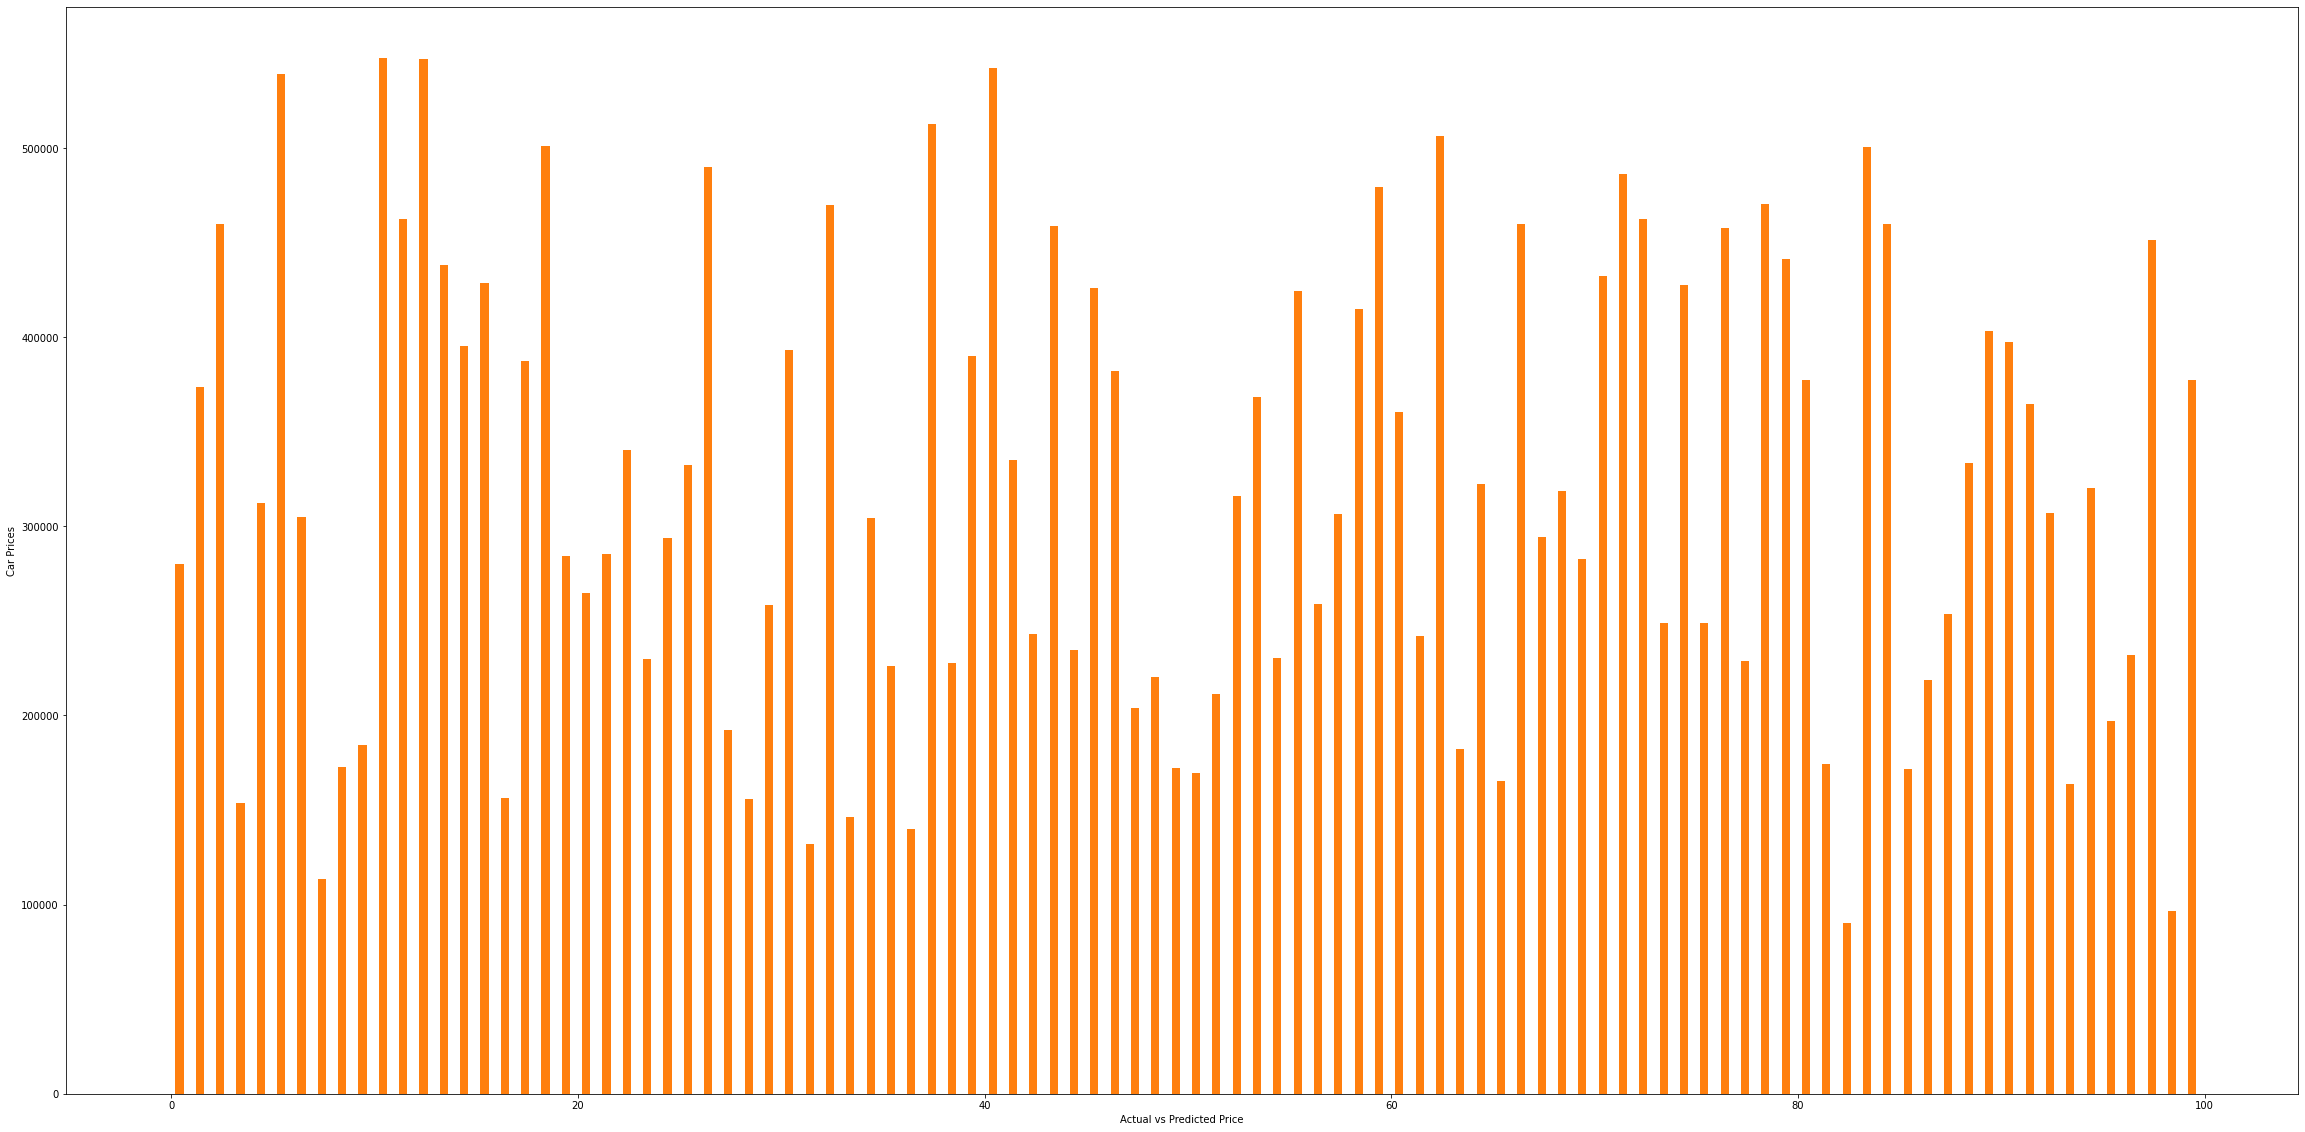

In [37]:
ind = np.arange(100)
plt.figure(figsize=(40, 20))

width = 0.4

plt.bar(ind, y_prid, width, label='Predict Car Price')
plt.bar(ind+width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Price')
plt.ylabel('Car Prices')

plt.show()